### **Linear regression - Medical insurance cost**

### Análisis de datos (EDA)

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

#### - Variables:
- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. índice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numérico)

In [3]:
df_inicio = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/medical_insurance_cost.csv', sep=',')
df_inicio

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df_inicio.info(), df_inicio.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None, (1338, 7))

In [5]:
df_inicio.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
List_cat = df_inicio.select_dtypes(include=['object']).columns.tolist()
List_num = df_inicio.select_dtypes(include=['float64','int64']).columns.tolist()
List_cat, List_num

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children', 'charges'])

In [7]:
df_inicio.drop_duplicates(), df_inicio.duplicated().sum()

(      age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  33.770         1     no  southeast   1725.55230
 2      28    male  33.000         3     no  southeast   4449.46200
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 ...   ...     ...     ...       ...    ...        ...          ...
 1333   50    male  30.970         3     no  northwest  10600.54830
 1334   18  female  31.920         0     no  northeast   2205.98080
 1335   18  female  36.850         0     no  southeast   1629.83350
 1336   21  female  25.800         0     no  southwest   2007.94500
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [1337 rows x 7 columns],
 np.int64(1))

Observaciones
- un total de 1337 registros x 7 rows. Sin nulos. 4 numericos y 3 categorico
- el promedio de 'age' es de 39.29 con un minimo de 18 años y maximo de 64
- el promedio de 1 niño asegurado y max 5, el 75% de las personas tienen como maximo 2.
- hay un bmi de minimo 15.96, maximo de 53,13. El 25% tiene bmi mayor a 34.
- el target 'charges' tiene min 1121 y max 63770, indica un rango amplio.

In [8]:
df_inicio['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
df_inicio.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


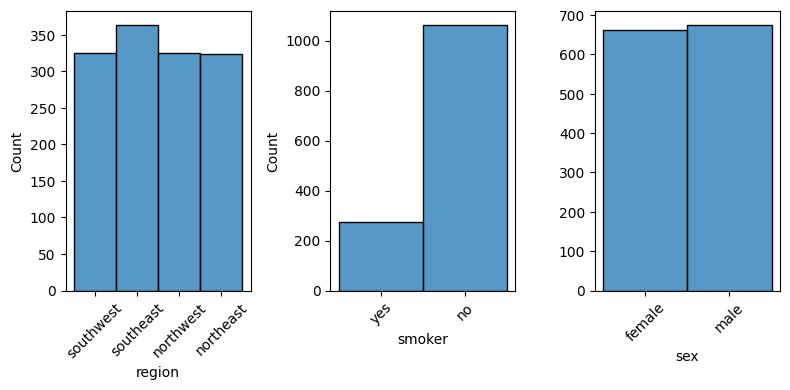

In [10]:
fig, axis = plt.subplots(1, 3, figsize=(8, 4))
sns.histplot(ax=axis[0], data=df_inicio, x="region")
sns.histplot(ax=axis[1], data=df_inicio, x="smoker")
sns.histplot(ax=axis[2], data=df_inicio, x="sex").set(ylabel=None)

axis[0].tick_params(axis='x',rotation=45)
axis[1].tick_params(axis='x',rotation=45)
axis[2].tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()

de estas variables categoricas podemos decir que:
- esta equilibrado entre hombres y mujeres. 
- hay un equilibrio entre las regiones (ademas que nos parece irrelevante el lugar).
- hay mas no fumadores que los que si

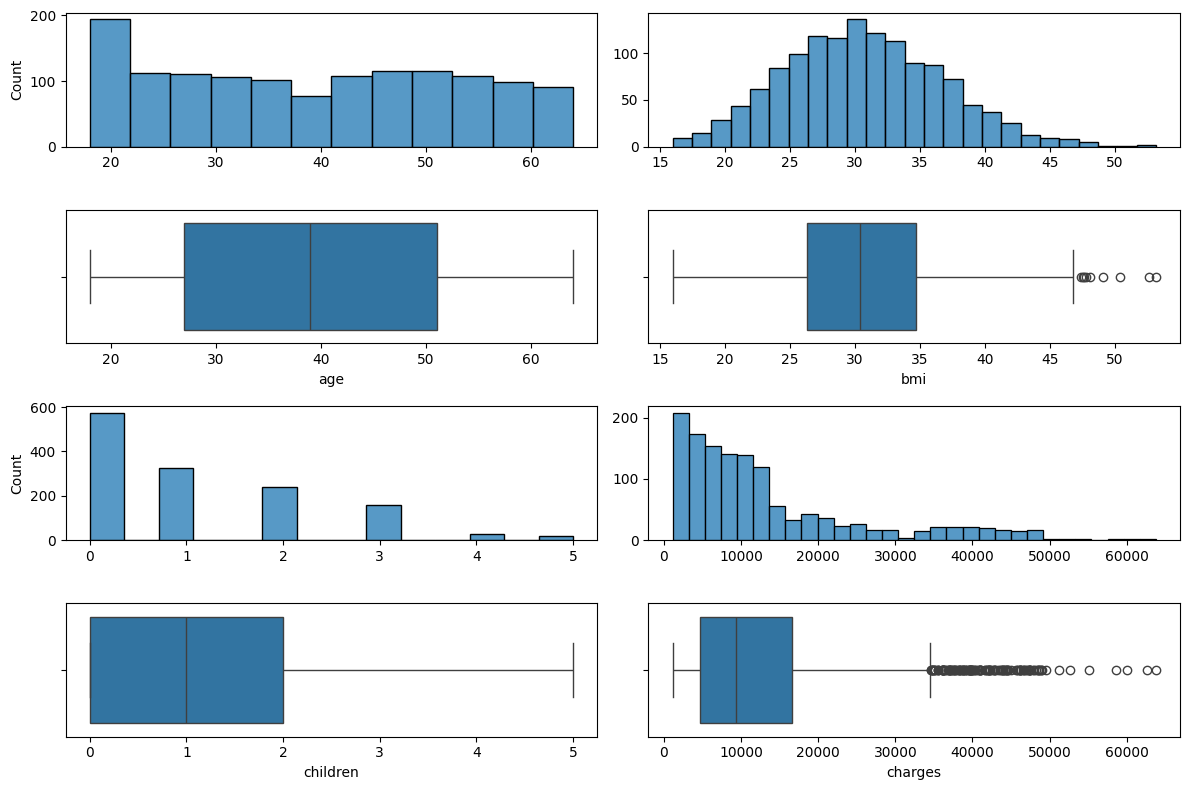

In [11]:
fig, axis = plt.subplots(4, 2, figsize=(12, 8))
#axis[0, 0].set_xticks(np.arange(0, 600, 100))
sns.histplot(ax=axis[0, 0], data=df_inicio, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df_inicio, x="age")
sns.histplot(ax=axis[0, 1], data=df_inicio, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df_inicio, x="bmi")
sns.histplot(ax=axis[2, 0], data=df_inicio, x="children").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df_inicio, x="children")
sns.histplot(ax=axis[2, 1], data=df_inicio, x="charges").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df_inicio, x="charges")

plt.tight_layout()
plt.show()

Observaciones
- La media de las edades es de 39 aproximamente
- El grafico de bmi muestra que hay gran cantidad de clientes entre los 25-35 de bmi.
- Existe un numero muy alto de personas que no tienen a nadie agregado a su seguro, la media es 1.
- Se observan un gran nummero de outliers a partir de 35.000, donde sabemos que el max es 63.770 y la media es 13270. Teniendo el cuenta que el 50% de los clientes estan en 9382. Vemos que hay muchos valores atipicos.

- En una instancia se pensó en eliminar cierta franja de costos para un indice corporal mayor y determinada edad, pero al finalizar, nos hemos decidido por dejar todos los valores altos con outliers para obtener las primas mas altas tambien.

In [12]:
df_inicio = df_inicio.copy()
df_inicio['sex_f'] = pd.factorize(df_inicio['sex'])[0]
df_inicio['smoker_f'] = pd.factorize(df_inicio['smoker'])[0]
df_inicio['region_f'] = pd.factorize(df_inicio['region'])[0]

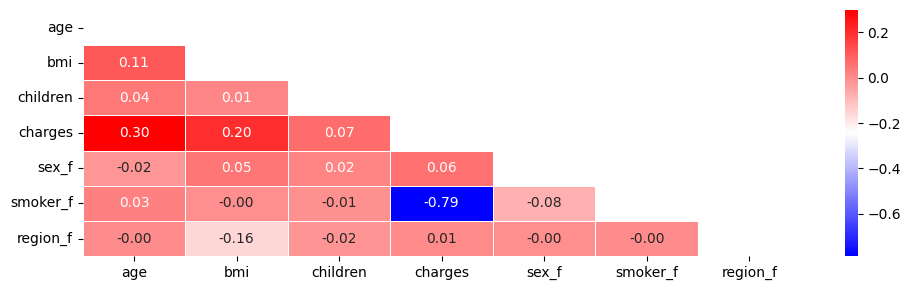

In [13]:
corr = df_inicio[['age', 'bmi', 'children', 'charges','sex_f','smoker_f','region_f']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,3))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

Obervaciones:
- En el grafico de correlacion, nos muestra que entre nuestras variables predictoras, nuestro objetivo esta altamente relacionado con 'smokers', si el cliente es fumador o no su prima va a ser mayor o menor.
- En segundo lugar, vemos una ligera correlacion del objetivo con la variable 'age'.
- En tercer lugar, aparece el 'bmi' indice de masa corporal como siguiente variable ligeramente relacionada con smoker y la region.

**Split**

In [14]:
df_inicio.drop(['sex_f', 'smoker_f', 'region_f'], axis=1, inplace=True)
df_inicio

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_inicio.drop(['charges'], axis=1)
y = df_inicio['charges']

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [17]:
X_train.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/X_train_insurance.csv", index=False)
X_test.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/X_test_insurance.csv", index=False)
y_train.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/y_train_insurance.csv", index=False)
y_test.to_csv("/workspaces/GuilloMansa-MachineLearning/data/processed/y_test_insurance.csv", index=False)

**Scaling y encoding**

In [18]:
# 0. Creamos copias de los conjuntos de entrenamiento y prueba
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# ===== PASO 1: OneHotEncoder para variables NOMINALES =====
categorical_nominal = ['sex', 'smoker','region']

# Crear el encoder con drop='first' para evitar multicolinealidad
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Entrenar el encoder SOLO con train
onehot_encoder.fit(X_train[categorical_nominal])

# Transformar train y test
X_train_cat_ohe = onehot_encoder.transform(X_train[categorical_nominal])
X_test_cat_ohe = onehot_encoder.transform(X_test[categorical_nominal])

# Convertir a DataFrame con nombres descriptivos
X_train_ohe_df = pd.DataFrame(
    X_train_cat_ohe, 
    index=X_train.index,
    columns=onehot_encoder.get_feature_names_out(categorical_nominal))

X_test_ohe_df = pd.DataFrame(
    X_test_cat_ohe,
    index=X_test.index,
    columns=onehot_encoder.get_feature_names_out(categorical_nominal))

# ===== PASO 3: Concatenar todo =====
# Eliminamos las columnas originales categóricas (ya están codificadas)
X_train_encoded = X_train_encoded.drop(columns=categorical_nominal)
X_test_encoded = X_test_encoded.drop(columns=categorical_nominal)

# Concatenamos: variables numéricas + education_le + variables one-hot
X_train_cat_le = pd.concat([X_train_encoded, X_train_ohe_df], axis=1)
X_test_cat_le = pd.concat([X_test_encoded, X_test_ohe_df], axis=1)

In [19]:
X_train_cat_le

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1153,35,35.815,1,0.0,0.0,1.0,0.0,0.0
1100,33,19.095,2,0.0,1.0,0.0,0.0,0.0
661,57,23.980,1,0.0,0.0,0.0,1.0,0.0
147,51,37.730,1,0.0,0.0,0.0,1.0,0.0
534,64,40.480,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1198,40,29.355,1,1.0,0.0,1.0,0.0,0.0
837,56,28.310,0,0.0,0.0,0.0,0.0,0.0
1144,50,32.300,2,1.0,0.0,0.0,0.0,1.0
275,47,26.600,2,0.0,0.0,0.0,0.0,0.0


In [20]:
X_train_cat_le.shape, X_test_cat_le.shape

((1070, 8), (268, 8))

**Normalizacion**

In [21]:
#Realizar el escalado con el dataset dividido solo con las variables numericas
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ["age",	"bmi",	"children",	"sex_male",	"smoker_yes",	"region_northwest", "region_southeast",	"region_southwest"]
norm_features_x_train = norm_scaler.fit_transform(X_train_cat_le[num_variables])
norm_features_x_test = norm_scaler.transform(X_test_cat_le[num_variables])

X_train_cat_le_scaled = pd.DataFrame(norm_features_x_train,
                       index=X_train_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled = pd.DataFrame(norm_features_x_test,
                       index=X_test_cat_le.index,
                       columns=num_variables)
X_train_cat_le_scaled.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1153,-0.327687,0.830921,-0.086515,-1.003745,-0.495615,1.760573,-0.614078,-0.576631
1100,-0.469154,-1.931945,0.740013,-1.003745,2.017694,-0.567997,-0.614078,-0.576631
661,1.228447,-1.124732,-0.086515,-1.003745,-0.495615,-0.567997,1.628459,-0.576631
147,0.804047,1.147361,-0.086515,-1.003745,-0.495615,-0.567997,1.628459,-0.576631
534,1.723581,1.601780,-0.913043,0.996269,-0.495615,-0.567997,1.628459,-0.576631


**Entreno el modelo**

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_cat_le_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4, b5,b6, b7): {model.coef_}")

Intercepto (a): 13251.695066045793
Coeficientes (b1, b2, b3, b4, b5,b6, b7): [3690.70844989 1812.3694058   623.93933024   61.27814056 9567.35857327
 -136.19545463 -346.44192355 -359.15780593]


**Prediccion**

In [24]:
y_pred = model.predict(X_test_cat_le_scaled)
y_pred

array([36525.58931504, 33612.56472378,  9376.815484  , 31866.67227056,
       39138.1696167 ,  3767.61255933, 31918.97166958, 13552.57382627,
       35561.71697436, 31498.79745321,  1019.62213283, 32164.36708907,
       36024.27692002,  3155.91026697, 14991.94740643, 12118.28457763,
       12448.58005316, 23775.21065684,  8029.17117205, 28239.24695633,
       35790.2766323 ,  8960.41544507,  2927.36055079,  4459.41516164,
        -194.75995493,  2675.51905413, 26969.64846579,  4919.49598629,
        4672.13507237, 26312.46173943, 30198.41286458,    61.05052818,
        4011.99136078,  2369.43278058, 27385.68193085,  1594.74112828,
       15945.89163253, 12212.90687055, 30486.3834447 ,  2792.66771237,
        4195.87131314, 35383.33006546,  4007.01623064, 34222.52926682,
        8192.60619877,  4678.13634723, 38110.42037285, 33859.59613253,
        9617.93495765, -1007.98471303, 10812.27423213, 31115.27891449,
        4013.6335633 ,  6719.61756142,  3570.85527368,  6763.97879997,
      

In [25]:
f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}"

'Error cuadrático medio: 36862294.82316176'

In [26]:
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 36862294.82316176
RMSE: 6071.43268291445


In [27]:
f"Coeficiente de determinación: {r2_score(y_test, y_pred)}"

'Coeficiente de determinación: 0.7660252638317882'

#### **Interpretacion de datos y conclusiones:** 

>- Que el mean squared error de tan grande indica que, en promedio, las predicciones del modelo se alejan del valor real. Pueda que sean altos los valores de la variable objetivo o el modelo falle en relacionar las variables predictoras.
>- El coeficiente de determinación es aceptable, un r2 de 0.76 significa que el modelo explica el 76% de los datos, es bueno pero no tiene una precision absoluta. Se estima que es un valora razonable bueno, ya que es un modelo simple de regresion lineal.
>- Se puede ver que hay margen para mejorar el modelo, dado que el MSE es alto.
>- El coeficiente de determinacion es aceptable
>- Podría usarse la hiperparametrización, ajustando parametros y/o agregar o seleccionar mejores caracteristicas, tambien ajustando outliers que quizas estén molestando en la prediccion.
>- Puede haber valores atípicos afectando el mse, un mse alto con un r2 decente nos suele indicar que hay puntos alejados que generan errores.
>- Se entiende que las métricas juntas, indican que el modelo sigue bastante bien las tendencias del objetivo, da bien el r2 pero, las predicciones individuales tienen un error elevado (alto MSE y RMSE), no es tan preciso con valores exaactos.

Conclusiones:
- Se demuestra que el modelo captura bien la tendencia general, pero todavía tiene margen de mejora ajustando variables o normalizando datos.